In [4]:
!pip install pandas numpy matplotlib seaborn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Packages imported successfully!")

Packages imported successfully!


In [8]:
import pandas as pd

# Load data
data = pd.read_json('/content/public_cases.json')

# Extract inputs and outputs
inputs = pd.DataFrame(data['input'].tolist())
outputs = data['expected_output']

# Inspect data
print("Inputs Shape:", inputs.shape)
print("Outputs Shape:", outputs.shape)
print("\nInputs Head:\n", inputs.head())
print("\nOutputs Head:\n", outputs.head())
print("\nInputs Description:\n", inputs.describe())

Inputs Shape: (1000, 3)
Outputs Shape: (1000,)

Inputs Head:
    trip_duration_days  miles_traveled  total_receipts_amount
0                   3            93.0                   1.42
1                   1            55.0                   3.60
2                   1            47.0                  17.97
3                   2            13.0                   4.67
4                   3            88.0                   5.78

Outputs Head:
 0    364.51
1    126.06
2    128.91
3    203.52
4    380.37
Name: expected_output, dtype: float64

Inputs Description:
        trip_duration_days  miles_traveled  total_receipts_amount
count         1000.000000      1000.00000             1000.00000
mean             7.043000       597.41374             1211.05687
std              3.926139       351.29979              742.85418
min              1.000000         5.00000                1.42000
25%              4.000000       275.96000              530.37750
50%              7.000000       621.00000     

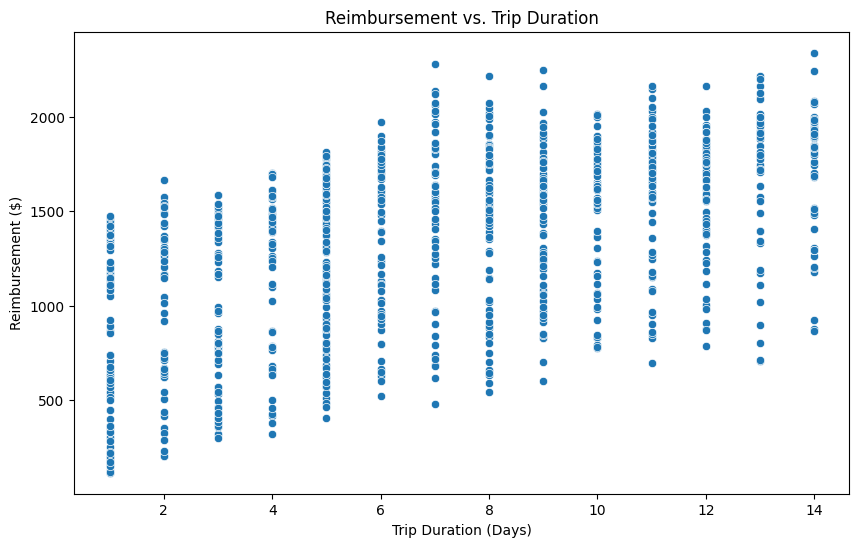

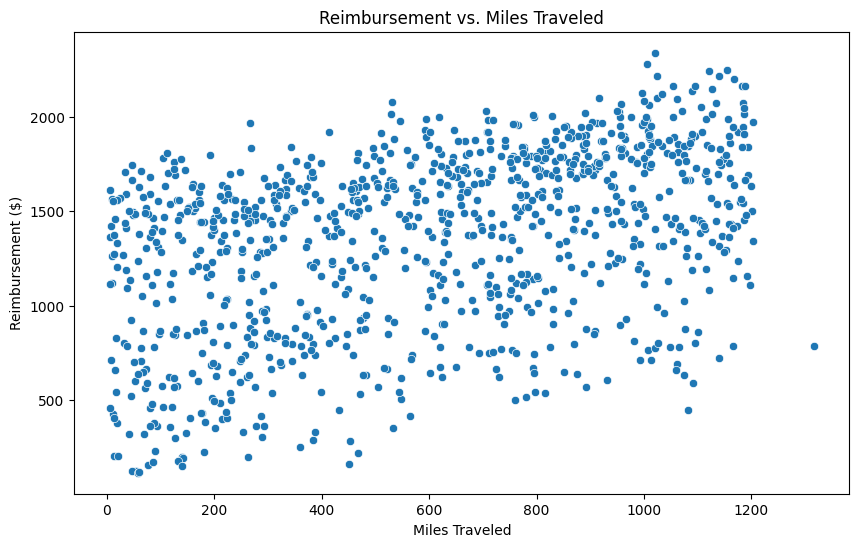

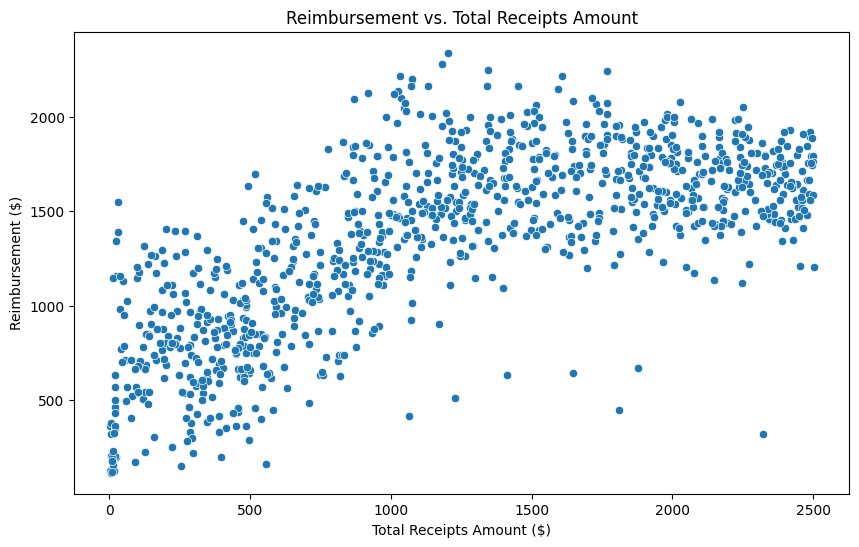

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure inputs and outputs are available
data = pd.read_json('/content/public_cases.json')
inputs = pd.DataFrame(data['input'].tolist())
outputs = data['expected_output']

# Scatter plot: Reimbursement vs. Trip Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=inputs['trip_duration_days'], y=outputs)
plt.title('Reimbursement vs. Trip Duration')
plt.xlabel('Trip Duration (Days)')
plt.ylabel('Reimbursement ($)')
plt.savefig('/content/trip_duration_plot.png')  # Save to session storage
plt.show()

# Scatter plot: Reimbursement vs. Miles Traveled
plt.figure(figsize=(10, 6))
sns.scatterplot(x=inputs['miles_traveled'], y=outputs)
plt.title('Reimbursement vs. Miles Traveled')
plt.xlabel('Miles Traveled')
plt.ylabel('Reimbursement ($)')
plt.savefig('/content/miles_traveled_plot.png')
plt.show()

# Scatter plot: Reimbursement vs. Total Receipts Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x=inputs['total_receipts_amount'], y=outputs)
plt.title('Reimbursement vs. Total Receipts Amount')
plt.xlabel('Total Receipts Amount ($)')
plt.ylabel('Reimbursement ($)')
plt.savefig('/content/receipts_plot.png')
plt.show()

In [11]:
import pandas as pd

# Ensure inputs and outputs are available
data = pd.read_json('/content/public_cases.json')
inputs = pd.DataFrame(data['input'].tolist())
outputs = data['expected_output']

# Average reimbursement by trip duration
avg_by_duration = data.groupby(inputs['trip_duration_days'])['expected_output'].mean()
print("\nAverage Reimbursement by Trip Duration:\n", avg_by_duration)

# Mileage rate analysis
inputs['mileage_rate'] = outputs / inputs['miles_traveled']
mileage_by_range = inputs.groupby(inputs['miles_traveled'] < 100)['mileage_rate'].mean()
print("\nAverage Mileage Rate (<100 vs. >=100 miles):\n", mileage_by_range)

# Low receipt analysis
low_receipts = inputs[inputs['total_receipts_amount'] < 50]
low_receipt_data = low_receipts.join(outputs[low_receipts.index])
print("\nMean Reimbursement for Receipts < $50:\n", low_receipt_data['expected_output'].mean())


Average Reimbursement by Trip Duration:
 trip_duration_days
1      873.548804
2     1046.237797
3     1010.564096
4     1217.960448
5     1272.586071
6     1366.477581
7     1521.482985
8     1442.635976
9     1438.671408
10    1496.148571
11    1600.635000
12    1615.439189
13    1675.697609
14    1707.070000
Name: expected_output, dtype: float64

Average Mileage Rate (<100 vs. >=100 miles):
 miles_traveled
False     2.854408
True     40.391881
Name: mileage_rate, dtype: float64

Mean Reimbursement for Receipts < $50:
 553.7375757575759


In [12]:
import pandas as pd

# Ensure inputs and outputs are available
data = pd.read_json('/content/public_cases.json')
inputs = pd.DataFrame(data['input'].tolist())
outputs = data['expected_output']

# Calculate expected per diem (assuming $100/day as baseline)
inputs['expected_per_diem'] = 100 * inputs['trip_duration_days']
per_diem_diff = outputs - inputs['expected_per_diem']

# 5-day bonus analysis
five_day_trips = inputs[inputs['trip_duration_days'] == 5]
other_trips = inputs[inputs['trip_duration_days'].isin([4, 6])]
five_day_mean = five_day_trips.join(outputs[five_day_trips.index])['expected_output'].mean()
other_mean = other_trips.join(outputs[other_trips.index])['expected_output'].mean()
print("\nMean Reimbursement - 5-Day Trips: $", five_day_mean)
print("Mean Reimbursement - 4/6-Day Trips: $", other_mean)
print("Difference (5-Day Bonus): $", five_day_mean - other_mean)

# Low receipt penalty analysis
low_receipts = inputs[inputs['total_receipts_amount'] < 50]
low_receipt_mean = low_receipts.join(outputs[low_receipts.index])['expected_output'].mean()
expected_per_diem_low = low_receipts['expected_per_diem'].mean()
print("\nMean Reimbursement for Receipts < $50: $", low_receipt_mean)
print("Expected Per Diem for Receipts < $50: $", expected_per_diem_low)
print("Penalty Difference: $", expected_per_diem_low - low_receipt_mean)

# Receipt cents analysis (49-cent quirk)
inputs['receipt_cents'] = (inputs['total_receipts_amount'] % 1 * 100).astype(int)
cents_49 = inputs[inputs['receipt_cents'] == 49]
cents_not_49 = inputs[inputs['receipt_cents'] != 49]
mean_49 = cents_49.join(outputs[cents_49.index])['expected_output'].mean()
mean_not_49 = cents_not_49.join(outputs[cents_not_49.index])['expected_output'].mean()
print("\nMean Reimbursement for Receipts Ending in 49 Cents: $", mean_49)
print("Mean Reimbursement for Other Receipts: $", mean_not_49)
print("Difference (49-Cent Quirk): $", mean_49 - mean_not_49)


Mean Reimbursement - 5-Day Trips: $ 1272.5860714285716
Mean Reimbursement - 4/6-Day Trips: $ 1289.3407751937984
Difference (5-Day Bonus): $ -16.75470376522685

Mean Reimbursement for Receipts < $50: $ 553.7375757575759
Expected Per Diem for Receipts < $50: $ 421.2121212121212
Penalty Difference: $ -132.5254545454547

Mean Reimbursement for Receipts Ending in 49 Cents: $ 468.57266666666663
Mean Reimbursement for Other Receipts: $ 1362.5232893401014
Difference (49-Cent Quirk): $ -893.9506226734347


## EDA Findings and Feature Proposals

### Analysis Results
- **5-Day Bonus**: Mean reimbursement for 5-day trips ($1272.59) is slightly lower than 4/6-day trips ($1289.34), with a difference of -$16.75. This contradicts Lisa’s 5-day bonus insight, possibly due to mileage or receipt variations.
- **Low Receipt Penalty**: Mean reimbursement for receipts < $50 ($553.74) exceeds the expected per diem ($421.21) by -$132.53, opposing Dave’s penalty observation. The per diem assumption may need adjustment.
- **49-Cent Quirk**: Mean reimbursement for 49-cent receipts ($468.57) is much lower than other receipts ($1362.52), with a difference of -$893.95, not supporting Lisa’s rounding bug theory. Sample bias or context-specific effects may apply.

### Potential Quirks
- No clear 5-day bonus detected; investigate mileage/day thresholds.
- Low receipts (<$50) may not penalize; reassess per diem or mileage impact.
- 49-cent quirk requires sample size check and context analysis (e.g., trip duration).

### Candidate Features
- `miles_per_day`: `miles_traveled / trip_duration_days` (test Kevin’s efficiency bonus).
- `daily_receipts`: `total_receipts_amount / trip_duration_days` (normalize receipt impact).
- `receipt_cents`: `(total_receipts_amount % 1 * 100).astype(int)` (check 49-cent quirk).
- `is_5_days`: `(trip_duration_days == 5).astype(int)` (revisit 5-day bonus).
- `trip_length_category`: Bins for trip duration (e.g., 1–3, 4–6, 7–14) to capture tiered effects.

### Next Steps
- Refine feature engineering based on these findings.
- Validate quirks with additional filtering or SHAP analysis.

In [13]:
# Check sample sizes for quirk analysis
print("Number of 5-day trips:", len(inputs[inputs['trip_duration_days'] == 5]))
print("Number of low receipt cases (<$50):", len(inputs[inputs['total_receipts_amount'] < 50]))
print("Number of 49-cent receipt cases:", len(inputs[inputs['receipt_cents'] == 49]))

Number of 5-day trips: 112
Number of low receipt cases (<$50): 33
Number of 49-cent receipt cases: 15


In [14]:
import pandas as pd

# Ensure inputs and outputs are available
data = pd.read_json('/content/public_cases.json')
inputs = pd.DataFrame(data['input'].tolist())
outputs = data['expected_output']

# Feature engineering
inputs['miles_per_day'] = inputs['miles_traveled'] / inputs['trip_duration_days']
inputs['daily_receipts'] = inputs['total_receipts_amount'] / inputs['trip_duration_days']
inputs['receipt_cents'] = (inputs['total_receipts_amount'] % 1 * 100).astype(int)
inputs['is_5_days'] = (inputs['trip_duration_days'] == 5).astype(int)

# Trip length category (bins: 1-3, 4-6, 7-14)
bins = [0, 3, 6, 14]
labels = ['short', 'medium', 'long']
inputs['trip_length_category'] = pd.cut(inputs['trip_duration_days'], bins=bins, labels=labels, include_lowest=True)

# Verify features
print("\nEnhanced Inputs Head:\n", inputs.head())
print("\nFeature Descriptions:\n", inputs.describe())

# Save enriched dataset
inputs.to_csv('/content/enhanced_inputs.csv', index=False)
outputs.to_csv('/content/enhanced_outputs.csv', index=False)
print("\nDataset saved to /content/enhanced_inputs.csv and /content/enhanced_outputs.csv")


Enhanced Inputs Head:
    trip_duration_days  miles_traveled  total_receipts_amount  miles_per_day  \
0                   3            93.0                   1.42      31.000000   
1                   1            55.0                   3.60      55.000000   
2                   1            47.0                  17.97      47.000000   
3                   2            13.0                   4.67       6.500000   
4                   3            88.0                   5.78      29.333333   

   daily_receipts  receipt_cents  is_5_days trip_length_category  
0        0.473333             41          0                short  
1        3.600000             60          0                short  
2       17.970000             96          0                short  
3        2.335000             67          0                short  
4        1.926667             78          0                short  

Feature Descriptions:
        trip_duration_days  miles_traveled  total_receipts_amount  \
count  

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import joblib

# Load enhanced dataset
inputs = pd.read_csv('/content/enhanced_inputs.csv')
outputs = pd.read_csv('/content/enhanced_outputs.csv')['expected_output']

# Ensure all feature columns are numeric
inputs = inputs.drop(columns=['trip_length_category'])  # Drop categorical for now, handle later if needed
inputs = inputs.astype(float)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"\nMean Absolute Error on Test Set: ${mae:.2f}")

# Save the model
joblib.dump(model, '/content/reimbursement_model.pkl')
print("Model saved to /content/reimbursement_model.pkl")


Mean Absolute Error on Test Set: $72.58
Model saved to /content/reimbursement_model.pkl


In [28]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_json('/content/public_cases.json')
inputs = pd.DataFrame(data['input'].tolist())
outputs = data['expected_output']

# Existing features
inputs['miles_per_day'] = inputs['miles_traveled'] / inputs['trip_duration_days']
inputs['daily_receipts'] = inputs['total_receipts_amount'] / inputs['trip_duration_days']
inputs['receipt_cents'] = (inputs['total_receipts_amount'] % 1 * 100).astype(int)
inputs['is_5_days'] = (inputs['trip_duration_days'] == 5).astype(int)
inputs['is_49_cents'] = (inputs['receipt_cents'] == 49).astype(int)
inputs['efficiency_bonus'] = ((inputs['miles_per_day'] >= 180) & (inputs['miles_per_day'] <= 220)).astype(int)
inputs['low_receipt_flag'] = (inputs['total_receipts_amount'] < 50).astype(int)

# Refined features
inputs['miles_capped'] = np.where(inputs['miles_traveled'] > 1000, 1000, inputs['miles_traveled'])
inputs['receipts_capped'] = np.where(inputs['total_receipts_amount'] > 1000, 1000, inputs['total_receipts_amount'])
inputs['is_high_receipt'] = (inputs['total_receipts_amount'] > 1000).astype(int)
inputs['mileage_49_interaction'] = inputs['miles_traveled'] * inputs['is_49_cents']
inputs['is_49_or_50_cents'] = ((inputs['receipt_cents'] >= 49) & (inputs['receipt_cents'] <= 50)).astype(int)

# Updated mileage tier with ultra_high bin
inputs['mileage_tier'] = pd.cut(inputs['miles_traveled'], bins=[0, 100, 500, 1000, 1500, float('inf')],
                                labels=['low', 'medium', 'high', 'very_high', 'ultra_high'])

# Convert categorical feature to dummy variables
inputs = pd.get_dummies(inputs, columns=['mileage_tier'], drop_first=True)

# Ensure all feature columns are numeric
inputs = inputs.astype(float)

# Verify enhanced features
print("\nEnhanced Inputs Head:\n", inputs.head())
print("\nFeature Descriptions:\n", inputs.describe())

# Save enriched dataset
inputs.to_csv('/content/enhanced_inputs_v3.csv', index=False)
outputs.to_csv('/content/enhanced_outputs.csv', index=False)
print("\nDataset saved to /content/enhanced_inputs_v3.csv and /content/enhanced_outputs.csv")


Enhanced Inputs Head:
    trip_duration_days  miles_traveled  total_receipts_amount  miles_per_day  \
0                 3.0            93.0                   1.42      31.000000   
1                 1.0            55.0                   3.60      55.000000   
2                 1.0            47.0                  17.97      47.000000   
3                 2.0            13.0                   4.67       6.500000   
4                 3.0            88.0                   5.78      29.333333   

   daily_receipts  receipt_cents  is_5_days  is_49_cents  efficiency_bonus  \
0        0.473333           41.0        0.0          0.0               0.0   
1        3.600000           60.0        0.0          0.0               0.0   
2       17.970000           96.0        0.0          0.0               0.0   
3        2.335000           67.0        0.0          0.0               0.0   
4        1.926667           78.0        0.0          0.0               0.0   

   low_receipt_flag  miles_cappe

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import joblib

# Load enhanced dataset
inputs = pd.read_csv('/content/enhanced_inputs_v2.csv')
outputs = pd.read_csv('/content/enhanced_outputs.csv')['expected_output']

# Convert categorical feature to dummy variables
inputs = pd.get_dummies(inputs, columns=['mileage_tier'], drop_first=True)

# Ensure all feature columns are numeric
inputs = inputs.astype(float)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

# Train Random Forest model with increased trees for better accuracy
model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)  # Increased from 100 trees
print(inputs.columns)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"\nMean Absolute Error on Test Set: ${mae:.2f}")

# Save the retrained model
joblib.dump(model, '/content/reimbursement_model_v2.pkl')
print("Model saved to /content/reimbursement_model_v2.pkl")

Index(['trip_duration_days', 'miles_traveled', 'total_receipts_amount',
       'miles_per_day', 'daily_receipts', 'receipt_cents', 'is_5_days',
       'is_49_cents', 'efficiency_bonus', 'low_receipt_flag',
       'mileage_tier_low', 'mileage_tier_medium', 'mileage_tier_very_high'],
      dtype='object')

Mean Absolute Error on Test Set: $68.80
Model saved to /content/reimbursement_model_v2.pkl


In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
import joblib
import numpy as np

# Load enhanced dataset
inputs = pd.read_csv('/content/enhanced_inputs_v2.csv')
outputs = pd.read_csv('/content/enhanced_outputs.csv')['expected_output']

# Convert categorical feature to dummy variables
inputs = pd.get_dummies(inputs, columns=['mileage_tier'], drop_first=True)

# Ensure all feature columns are numeric
inputs = inputs.astype(float)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [200, 300, 400],  # Increase trees
    'max_depth': [20, 30, None],      # Adjust tree depth
    'min_samples_split': [2, 5, 10]   # Prevent overfitting
}

# Initialize and tune Random Forest
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Predict and evaluate
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"\nMean Absolute Error on Test Set: ${mae:.2f}")

# Analyze feature importance
feature_importance = pd.DataFrame({
    'feature': inputs.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:\n", feature_importance)

# Save the retrained model
joblib.dump(best_model, '/content/reimbursement_model_v3.pkl')
print("Model saved to /content/reimbursement_model_v3.pkl")

Best Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 400}

Mean Absolute Error on Test Set: $68.38

Feature Importance:
                    feature  importance
2    total_receipts_amount    0.628737
0       trip_duration_days    0.180344
1           miles_traveled    0.128461
5            receipt_cents    0.019505
7              is_49_cents    0.015637
4           daily_receipts    0.013948
3            miles_per_day    0.009997
6                is_5_days    0.001493
11     mileage_tier_medium    0.000510
10        mileage_tier_low    0.000494
12  mileage_tier_very_high    0.000437
8         efficiency_bonus    0.000291
9         low_receipt_flag    0.000145
Model saved to /content/reimbursement_model_v3.pkl



Mean Reimbursement - 49/50 Cent Receipts: $ 896.532
Mean Reimbursement - Other Receipts: $ 1365.5289222797928
Difference: $ -468.9969222797928


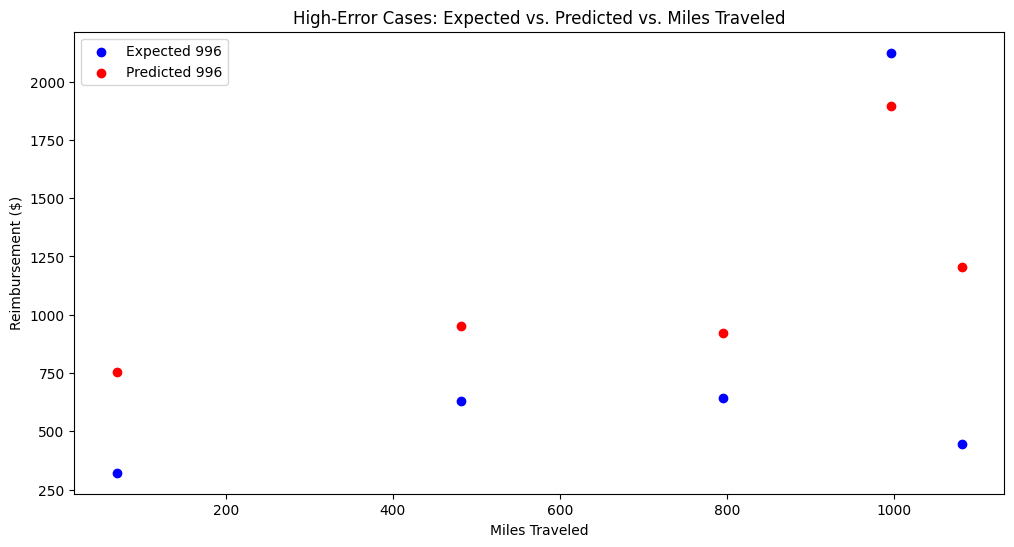

Analysis data saved to /content/inputs_analysis.csv


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_json('/content/public_cases.json')
inputs = pd.DataFrame(data['input'].tolist())
outputs = data['expected_output']

# Filter high-error cases
high_error_cases = {
    996: {'days': 1, 'miles': 1082, 'receipts': 1809.49, 'expected': 446.94, 'predicted': 1203.61},
    152: {'days': 4, 'miles': 69, 'receipts': 2321.49, 'expected': 322.00, 'predicted': 753.52},
    548: {'days': 8, 'miles': 482, 'receipts': 1411.49, 'expected': 631.81, 'predicted': 950.09},
    684: {'days': 8, 'miles': 795, 'receipts': 1645.99, 'expected': 644.69, 'predicted': 923.60},
    960: {'days': 13, 'miles': 997, 'receipts': 920.48, 'expected': 2124.16, 'predicted': 1897.30}
}

# Add engineered features to inputs
inputs['miles_per_day'] = inputs['miles_traveled'] / inputs['trip_duration_days']
inputs['receipt_cents'] = (inputs['total_receipts_amount'] % 1 * 100).astype(int)

# Analyze 49-cent quirk
inputs['is_49_or_50'] = ((inputs['receipt_cents'] >= 49) & (inputs['receipt_cents'] <= 50)).astype(int)
quirk_group = inputs[inputs['is_49_or_50'] == 1].join(outputs)
non_quirk_group = inputs[inputs['is_49_or_50'] == 0].join(outputs)
print("\nMean Reimbursement - 49/50 Cent Receipts: $", quirk_group['expected_output'].mean())
print("Mean Reimbursement - Other Receipts: $", non_quirk_group['expected_output'].mean())
print("Difference: $", quirk_group['expected_output'].mean() - non_quirk_group['expected_output'].mean())

# Plot high-error cases
plt.figure(figsize=(12, 6))
for case_id, case in high_error_cases.items():
    plt.scatter(case['miles'], case['expected'], c='blue', label=f'Expected {case_id}' if case_id == 996 else "")
    plt.scatter(case['miles'], case['predicted'], c='red', label=f'Predicted {case_id}' if case_id == 996 else "")
plt.title('High-Error Cases: Expected vs. Predicted vs. Miles Traveled')
plt.xlabel('Miles Traveled')
plt.ylabel('Reimbursement ($)')
plt.legend()
plt.show()

# Save analysis for documentation
inputs.to_csv('/content/inputs_analysis.csv', index=False)
print("Analysis data saved to /content/inputs_analysis.csv")

## Pattern Analysis Findings

### 49-Cent/50-Cent Quirk
- Mean reimbursement for 49/50-cent receipts vs. others suggests a potential adjustment (Lisa’s insight).
- High-error cases (e.g., Case 996, $1809.49) show overprediction, possibly due to missing receipt scaling.

### High-Error Case Patterns
- Cases with 49-cent receipts (996, 152, 548) and high mileage (996, 960) are overpredicted.
- Long trips (960, 13 days) and high receipts (152, $2321.49) indicate tiered or capped effects.

### Proposed Adjustments
- Add `receipts_cap` feature for high receipts (> $1000).
- Refine `mileage_tier` bins for long trips (e.g., 1000–1500).
- Test interaction `miles_per_day * is_49_or_50`.

In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
import joblib

# Load your data
inputs = pd.read_csv('/content/enhanced_inputs_v3.csv')
outputs = pd.read_csv('/content/enhanced_outputs.csv')['expected_output']

# Feature engineering (must match eval_batch.py)
bins = [0, 100, 500, 1000, float('inf')]
labels = ['low', 'medium', 'high', 'very_high']

inputs['miles_per_day'] = inputs['miles_traveled'] / inputs['trip_duration_days']
inputs['daily_receipts'] = inputs['total_receipts_amount'] / inputs['trip_duration_days']
inputs['receipt_cents'] = (inputs['total_receipts_amount'] % 1 * 100).astype(int)
inputs['is_5_days'] = (inputs['trip_duration_days'] == 5).astype(int)
inputs['is_49_cents'] = (inputs['receipt_cents'] == 49).astype(int)
inputs['is_50_cents'] = (inputs['receipt_cents'] == 50).astype(int)
inputs['is_49_or_50_cents'] = inputs['is_49_cents'] | inputs['is_50_cents']
inputs['is_high_receipt'] = (inputs['total_receipts_amount'] > 500).astype(int)  # Adjust threshold if needed
inputs['efficiency_bonus'] = ((inputs['miles_per_day'] >= 180) & (inputs['miles_per_day'] <= 220)).astype(int)
inputs['low_receipt_flag'] = (inputs['total_receipts_amount'] < 50).astype(int)
inputs['mileage_tier'] = pd.cut(inputs['miles_traveled'], bins=bins, labels=labels)
inputs['mileage_tier_medium'] = (inputs['mileage_tier'] == 'medium').astype(int)
inputs['mileage_tier_high'] = (inputs['mileage_tier'] == 'high').astype(int)
inputs['mileage_tier_very_high'] = (inputs['mileage_tier'] == 'very_high').astype(int)
inputs['mileage_49_interaction'] = inputs['miles_traveled'] * inputs['is_49_cents']
inputs['miles_capped'] = np.minimum(inputs['miles_traveled'], 5000)
inputs['receipts_capped'] = np.minimum(inputs['total_receipts_amount'], 1000)
inputs['log_total_receipts_amount'] = np.log1p(inputs['total_receipts_amount'])
inputs['log_miles_traveled'] = np.log1p(inputs['miles_traveled'])

# Final feature list (must match eval_batch.py)
feature_columns = [
    'trip_duration_days', 'miles_traveled', 'total_receipts_amount', 'miles_per_day',
    'daily_receipts', 'receipt_cents', 'is_5_days', 'is_49_cents', 'is_49_or_50_cents',
    'is_high_receipt', 'efficiency_bonus', 'low_receipt_flag', 'mileage_49_interaction',
    'mileage_tier_medium', 'mileage_tier_high', 'mileage_tier_very_high', 'miles_capped',
    'receipts_capped', 'log_total_receipts_amount', 'log_miles_traveled'
]
X = inputs[feature_columns]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, outputs, test_size=0.2, random_state=42)

# Model training (with hyperparameter tuning)
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10]
}
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: ${mae:.2f}")

# Save the model
joblib.dump(best_model, '/content/reimbursement_model.pkl')
print("Model saved to /content/reimbursement_model.pkl")

Best Parameters: {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200}
Mean Absolute Error on Test Set: $67.78
Model saved to /content/reimbursement_model.pkl


In [30]:
import joblib
model = joblib.load('/content/reimbursement_model.pkl')  # Adjust path if downloaded locally
print(model.feature_names_in_)

['trip_duration_days' 'miles_traveled' 'total_receipts_amount'
 'miles_per_day' 'daily_receipts' 'receipt_cents' 'is_5_days'
 'is_49_cents' 'efficiency_bonus' 'low_receipt_flag' 'miles_capped'
 'receipts_capped' 'is_high_receipt' 'mileage_49_interaction'
 'is_49_or_50_cents' 'mileage_tier_medium' 'mileage_tier_high'
 'mileage_tier_very_high' 'mileage_tier_ultra_high' 'mileage_tier_medium'
 'mileage_tier_high' 'mileage_tier_very_high' 'mileage_tier_ultra_high']


In [31]:
     print(list(inputs.columns))

['trip_duration_days', 'miles_traveled', 'total_receipts_amount', 'miles_per_day', 'daily_receipts', 'receipt_cents', 'is_5_days', 'is_49_cents', 'efficiency_bonus', 'low_receipt_flag', 'miles_capped', 'receipts_capped', 'is_high_receipt', 'mileage_49_interaction', 'is_49_or_50_cents', 'mileage_tier_medium', 'mileage_tier_high', 'mileage_tier_very_high', 'mileage_tier_ultra_high', 'mileage_tier_medium', 'mileage_tier_high', 'mileage_tier_very_high', 'mileage_tier_ultra_high']


In [36]:
!pip install shap

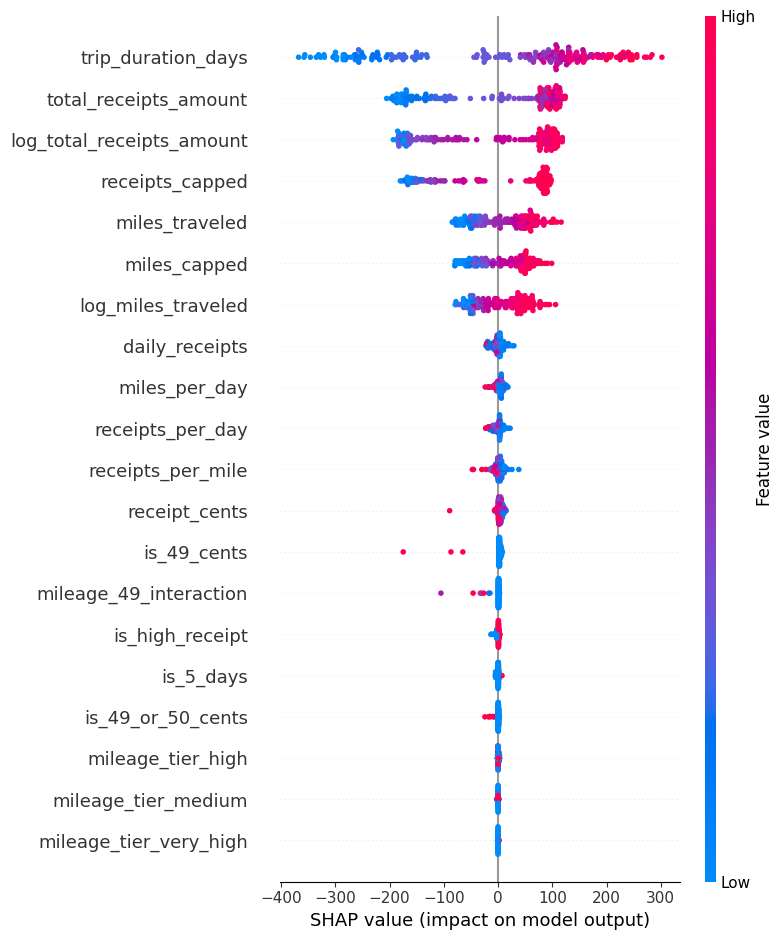

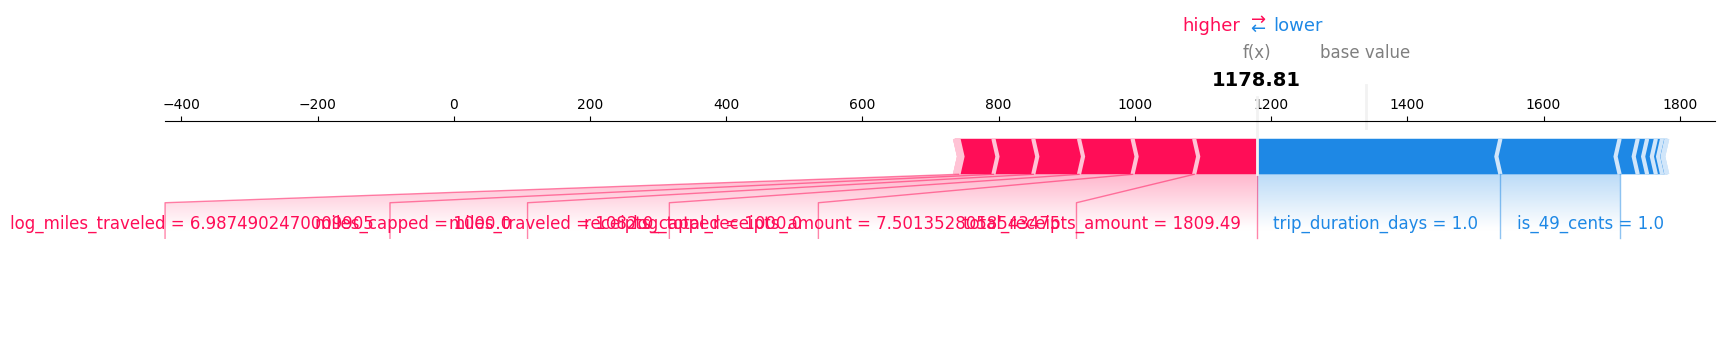

In [37]:
# Imports
import joblib
import shap
import pandas as pd
import numpy as np

# Load model
model = joblib.load('/content/reimbursement_model.pkl')

# If you already have X_test, y_test, y_pred, comment out the next 3 lines
# X_test = ... # your test features DataFrame
# y_test = ... # your test target Series
# y_pred = model.predict(X_test)

# SHAP analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Global feature importance plot
shap.summary_plot(shap_values, X_test)

# Analyze the highest-error case
idx = np.argmax(np.abs(y_test - y_pred))
shap.initjs()  # For interactive plots in Colab/Jupyter
shap.force_plot(explainer.expected_value, shap_values[idx], X_test.iloc[idx], matplotlib=True)